In [7]:
import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Importing Necessary Libraries and Load Dataset

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [9]:
data=pd.read_csv("input/Cleaned-Data2.csv")

# Data Preprocessing

In [10]:
data.shape

(173, 36)

In [11]:
print(data.describe())

        Weight_kg   Height_ft  Diet_Bread_Cereals  Diet_Milk_Products  \
count  173.000000  173.000000          173.000000          173.000000   
mean    56.549711  160.636647            5.445087            3.647399   
std     12.025369    7.287373            2.116832            2.548930   
min     36.000000  124.460000            0.000000            0.000000   
25%     49.000000  157.480000            4.000000            1.000000   
50%     55.000000  160.020000            7.000000            3.000000   
75%     64.000000  165.100000            7.000000            7.000000   
max    115.000000  182.880000            7.000000            7.000000   

       Diet_Fruits  Diet_Vegetables  Diet_Starchy_Vegetables  \
count   173.000000       173.000000               173.000000   
mean      3.034682         3.439306                 3.069364   
std       2.048527         1.769596                 1.857054   
min       0.000000         0.000000                 0.000000   
25%       1.000000    

This dataset has 173 rows * 36 columns

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         173 non-null    object 
 1   Weight_kg                   173 non-null    float64
 2   Height_ft                   173 non-null    float64
 3   Marital_Status              173 non-null    object 
 4   PCOS                        173 non-null    object 
 5   Family_History_PCOS         173 non-null    object 
 6   Menstrual_Irregularity      173 non-null    object 
 7   Hormonal_Imbalance          173 non-null    object 
 8   Hyperandrogenism            173 non-null    object 
 9   Hirsutism                   173 non-null    object 
 10  Mental_Health               173 non-null    object 
 11  Conception_Difficulty       173 non-null    object 
 12  Insulin_Resistance          173 non-null    object 
 13  Diabetes                    173 non

In [13]:
data.head()

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,...,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
0,20-25,66.0,157.48,Unmarried,No,No,Yes,No,No,No,...,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,Somewhat,No.
1,Less than 20,56.0,165.10,Unmarried,No,No,No,No,No,No,...,0,No,Daily,No Exercise,Less than 30 minutes,6-8 hours,No,No,Somewhat,No.
2,Less than 20,89.0,167.64,Unmarried,No,Yes,No,No,No,Yes,...,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
3,20-25,55.0,160.02,Unmarried,No,Yes,No,Yes,No,Yes,...,1,No,Never,No Exercise,Not Applicable,6-8 hours,Yes,No,Somewhat,No.
4,Less than 20,55.0,160.02,Unmarried,No,No,No,No,No,No,...,0,No,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,Yes,No,Not at All,No.


In [14]:
data.isnull().sum()

Age                           0
Weight_kg                     0
Height_ft                     0
Marital_Status                0
PCOS                          0
Family_History_PCOS           0
Menstrual_Irregularity        0
Hormonal_Imbalance            0
Hyperandrogenism              0
Hirsutism                     0
Mental_Health                 0
Conception_Difficulty         0
Insulin_Resistance            0
Diabetes                      0
Childhood_Trauma              0
Cardiovascular_Disease        0
Diet_Bread_Cereals            0
Diet_Milk_Products            0
Diet_Fruits                   0
Diet_Vegetables               0
Diet_Starchy_Vegetables       0
Diet_NonStarchy_Vegetables    0
Diet_Fats                     0
Diet_Sweets                   0
Diet_Fried_Food               0
Diet_Tea_Coffee               0
Diet_Multivitamin             0
Vegetarian                    0
Exercise_Frequency            0
Exercise_Type                 0
Exercise_Duration             0
Sleep_Ho

This dataset has no missing values.
Otherwise, to handle missing values:

df_dropped_rows = data.dropna()

or

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])

**One-Hot Encoding of Categorical Features**

In [15]:
categorical_cols = data.select_dtypes(include=['object']).columns

data_encoded = data.copy()

label_encoder = LabelEncoder()
for col in categorical_cols:
    data_encoded[col] = label_encoder.fit_transform(data[col])

**Feature Scaling**

In [16]:
scaler = MinMaxScaler()
numerical_cols = data.select_dtypes(include=[np.number]).columns

data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [17]:
data_encoded.head()

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,...,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
0,0,0.379747,0.565217,1,0,0,1,0,0,0,...,0.000000,0,4,0,0,2,0,0,2,5
1,5,0.253165,0.695652,1,0,0,0,0,0,0,...,0.000000,0,2,9,2,0,0,0,2,5
2,5,0.670886,0.739130,1,0,1,0,0,0,2,...,0.000000,0,4,0,2,0,1,0,2,5
3,0,0.240506,0.608696,1,0,1,0,2,0,2,...,0.142857,0,3,9,4,0,1,0,2,5
4,5,0.240506,0.608696,1,0,0,0,0,0,0,...,0.000000,0,2,0,1,0,1,0,1,5


# Exploratory Data Analysis

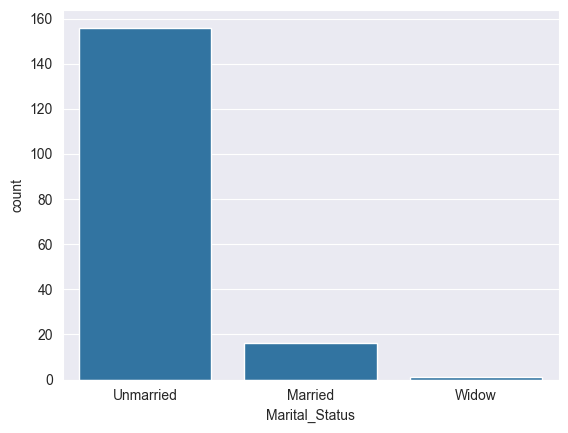

In [18]:
sns.countplot(x='Marital_Status', data=data)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6772\2509736480.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_labels)


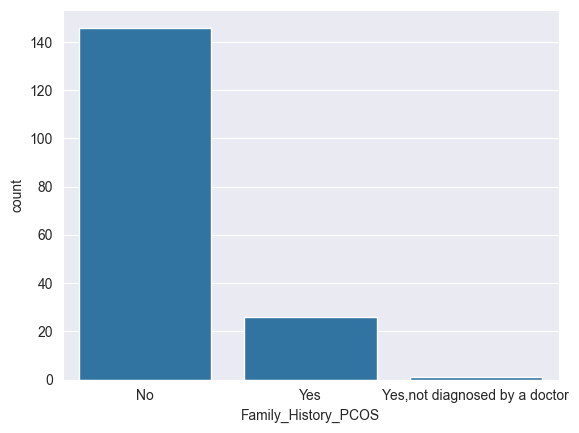

In [19]:
ax=sns.countplot(x='Family_History_PCOS', data=data)
custom_labels = ['No', 'Yes', 'Yes,not diagnosed by a doctor']
ax.set_xticklabels(custom_labels)

plt.show()

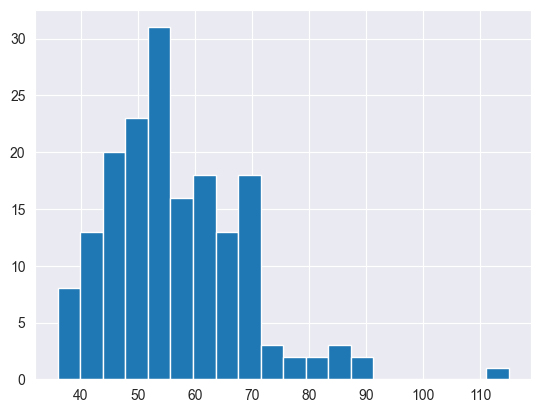

In [20]:
data['Weight_kg'].hist(bins=20)
plt.show()

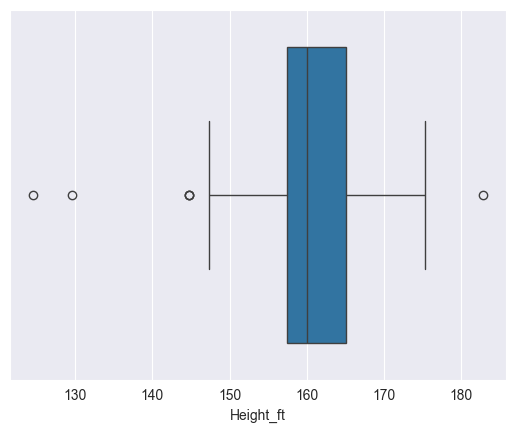

In [21]:
sns.boxplot(x='Height_ft', data=data)
plt.show()

This shows median height at 160 with 4 outliers.

In [22]:
print(data_encoded.columns)

Index(['Age', 'Weight_kg', 'Height_ft', 'Marital_Status', 'PCOS',
       'Family_History_PCOS', 'Menstrual_Irregularity', 'Hormonal_Imbalance',
       'Hyperandrogenism', 'Hirsutism', 'Mental_Health',
       'Conception_Difficulty', 'Insulin_Resistance', 'Diabetes',
       'Childhood_Trauma', 'Cardiovascular_Disease', 'Diet_Bread_Cereals',
       'Diet_Milk_Products', 'Diet_Fruits', 'Diet_Vegetables',
       'Diet_Starchy_Vegetables', 'Diet_NonStarchy_Vegetables', 'Diet_Fats',
       'Diet_Sweets', 'Diet_Fried_Food', 'Diet_Tea_Coffee',
       'Diet_Multivitamin', 'Vegetarian', 'Exercise_Frequency',
       'Exercise_Type', 'Exercise_Duration', 'Sleep_Hours', 'Stress_Level',
       'Smoking', 'Exercise_Benefit', 'PCOS_Medication'],
      dtype='object')


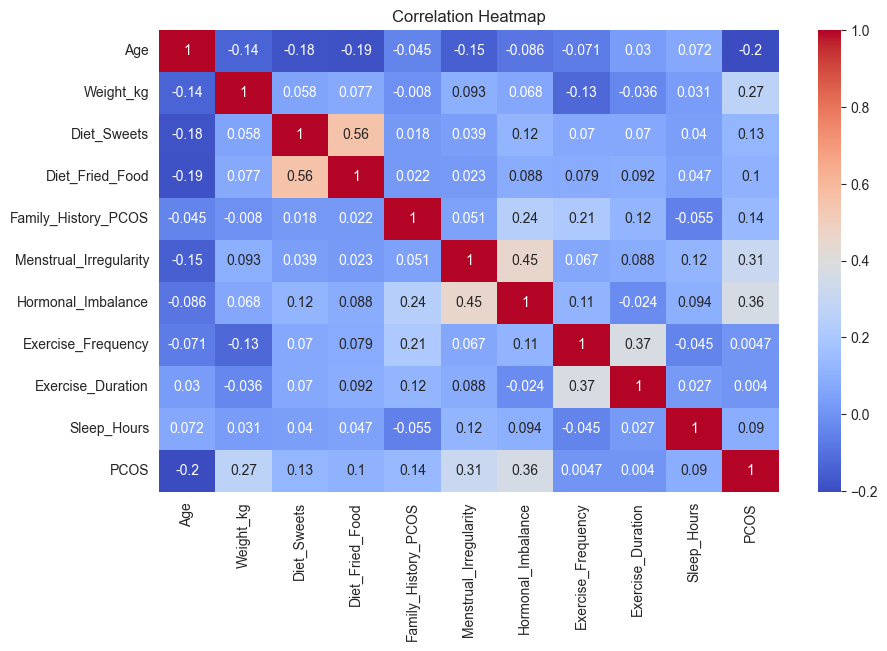

In [23]:
features = data_encoded[['Age','Weight_kg','Diet_Sweets', 'Diet_Fried_Food','Family_History_PCOS', 'Menstrual_Irregularity', 'Hormonal_Imbalance', 'Exercise_Frequency','Exercise_Duration','Sleep_Hours','PCOS']]
plt.figure(figsize=(10, 6))
sns.heatmap(features.corr(),annot=True ,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

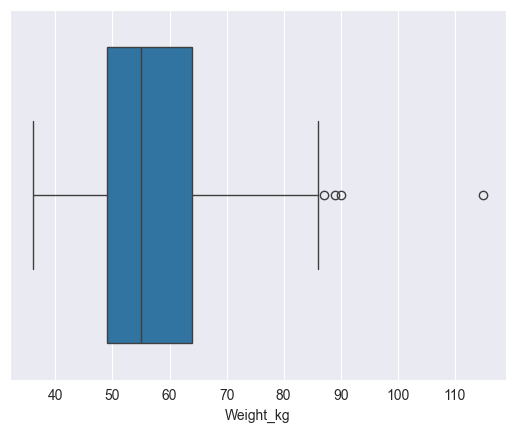

              Age  Weight_kg  Height_ft Marital_Status PCOS  \
2    Less than 20       89.0     167.64      Unmarried   No   
37          20-25      115.0     165.10      Unmarried   No   
130         20-25       87.0     157.48      Unmarried  Yes   
169         20-25       90.0     170.18      Unmarried  Yes   

    Family_History_PCOS Menstrual_Irregularity Hormonal_Imbalance  \
2                   Yes                     No                 No   
37                   No                    Yes                 No   
130                  No                    Yes                Yes   
169                  No                    Yes                Yes   

    Hyperandrogenism Hirsutism  ... Diet_Multivitamin Vegetarian  \
2                 No       Yes  ...                 0         No   
37                No        No  ...                 2         No   
130              Yes       Yes  ...                 0         No   
169               No        No  ...                 0         No  

In [24]:
sns.boxplot(x='Weight_kg', data=data)
plt.show()

Q1 = data['Weight_kg'].quantile(0.25)
Q3 = data['Weight_kg'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Weight_kg'] < (Q1 - 1.5 * IQR)) | 
              (data['Weight_kg'] > (Q3 + 1.5 * IQR))]
print(outliers)

# Feature Engineering
Feature engineering is the process of transforming raw data into meaningful features that better represent the underlying problem to predictive models, improving the model's performance.

In [25]:
data['Height_m'] = data['Height_ft'] * 0.3048  
data['BMI'] = data['Weight_kg'] / (data['Height_m'] ** 2)  

data_encoded['BMI'] = scaler.fit_transform(data[['BMI']])

In [26]:
weights = {
    'Diet_Bread_Cereals': 1,
    'Diet_Milk_Products': 1,
    'Diet_Fruits': 2,
    'Diet_Vegetables': 2,
    'Diet_Starchy_Vegetables': -1,
    'Diet_NonStarchy_Vegetables': 2,
    'Diet_Fats': -2,
    'Diet_Sweets': -3,
    'Diet_Fried_Food': -3,
    'Diet_Tea_Coffee': 0,
}
data_encoded['Nutritional_Score'] = data[list(weights.keys())].dot(pd.Series(weights))

In [27]:
data_encoded.head()

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,...,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication,BMI,Nutritional_Score
0,0,0.379747,0.565217,1,0,0,1,0,0,0,...,4,0,0,2,0,0,2,5,0.464145,-11
1,5,0.253165,0.695652,1,0,0,0,0,0,0,...,2,9,2,0,0,0,2,5,0.255378,13
2,5,0.670886,0.739130,1,0,1,0,0,0,2,...,4,0,2,0,1,0,2,5,0.638082,-10
3,0,0.240506,0.608696,1,0,1,0,2,0,2,...,3,9,4,0,1,0,2,5,0.287529,-28
4,5,0.240506,0.608696,1,0,0,0,0,0,0,...,2,0,1,0,1,0,1,5,0.287529,-2


# Model Building and Evaluation

In [28]:
X = data_encoded.drop(columns=['PCOS'])
y = data_encoded['PCOS']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree Classifier**

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
y_pred_dt = dt.predict(X_test)

In [31]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy with Decisiontree:",accuracy_dt)

Accuracy with Decisiontree: 0.7142857142857143


**Random Forest Classifier**

In [32]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred_rf = rf_model.predict(X_test)

In [34]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy with RandomForest:",accuracy_rf)

Accuracy with RandomForest: 0.8571428571428571


**Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

F:\ICBT_BSCE\ASSIGNMENTS\Computational_Intelligence\PCOSPrediction\PCOS-Project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred_lr = lr.predict(X_test)

In [37]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy with LogisticRegression:",accuracy_lr)

Accuracy with LogisticRegression: 0.8


**MLP Algo**

In [38]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [39]:
y_pred_clf = clf.predict(X_test)

In [40]:
accuracy_clf = accuracy_score(y_test, y_pred_clf)
print("Accuracy with multi-layer perceptron (MLP) algorithm:",accuracy_clf)

Accuracy with multi-layer perceptron (MLP) algorithm: 0.8


# Confusion Matrix of best model

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

[[27  0  1]
 [ 1  0  0]
 [ 3  0  3]]


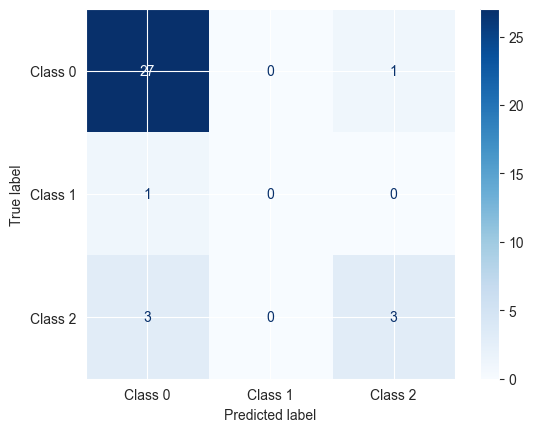

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1','Class 2'])
disp.plot(cmap='Blues')
plt.show()